In [2]:
import os
import zipfile

# Paths to the uploaded zip files
normal_zip_path = 'Normal_99.Zip'
severe_zip_path = 'Severe_68.Zip'
resized_normal_png_path = 'Resized_Normal_256_16bit_PNG.zip'
resized_severe_png_path = 'Resized_Severe_256_16bit_PNG.zip'

# Directories to extract the files
normal_extract_dir = 'Normal_99/'
severe_extract_dir = 'Severe_68/'
resized_normal_extract_dir = 'Resized_Normal_256_16bit_PNG/'
resized_severe_extract_dir = 'Resized_Severe_256_16bit_PNG/'

# Extract the normal MRI images
with zipfile.ZipFile(normal_zip_path, 'r') as zip_ref:
    zip_ref.extractall(normal_extract_dir)

# Extract the severe MRI images
with zipfile.ZipFile(severe_zip_path, 'r') as zip_ref:
    zip_ref.extractall(severe_extract_dir)

# Extract the resized normal PNG images
with zipfile.ZipFile(resized_normal_png_path, 'r') as zip_ref:
    zip_ref.extractall(resized_normal_extract_dir)

# Extract the resized severe PNG images
with zipfile.ZipFile(resized_severe_png_path, 'r') as zip_ref:
    zip_ref.extractall(resized_severe_extract_dir)

# Check the extracted directories
normal_files = os.listdir(normal_extract_dir)
severe_files = os.listdir(severe_extract_dir)
resized_normal_files = os.listdir(resized_normal_extract_dir)
resized_severe_files = os.listdir(resized_severe_extract_dir)

normal_files[:5], severe_files[:5], resized_normal_files[:5], resized_severe_files[:5]  # Displaying the first 5 files from each


(['106310815.dcm',
  '10728036.dcm',
  '107698245.dcm',
  '107935613.dcm',
  '108348787.dcm'],
 ['1009905322.dcm',
  '1038453736.dcm',
  '105895264.dcm',
  '1084486898.dcm',
  '1106510276.dcm'],
 ['normal_0.png',
  'normal_1.png',
  'normal_10.png',
  'normal_11.png',
  'normal_12.png'],
 ['severe_0.png',
  'severe_1.png',
  'severe_10.png',
  'severe_11.png',
  'severe_12.png'])

In [3]:
# Let's create a mapping between the DICOM files and their corresponding resized PNG files
import os

# Assuming the files are named sequentially, we'll map based on file index
def map_dicom_to_png(dicom_files, png_files, label):
    mapping = {}
    for idx, dicom_file in enumerate(dicom_files):
        dicom_file_path = os.path.join(normal_extract_dir if label == 0 else severe_extract_dir, dicom_file)
        png_file_name = f"{'normal' if label == 0 else 'severe'}_{idx}.png"
        png_file_path = os.path.join(resized_normal_extract_dir if label == 0 else resized_severe_extract_dir, png_file_name)
        
        mapping[dicom_file_path] = png_file_path
    
    return mapping

# Create mappings for normal and severe datasets
normal_mapping = map_dicom_to_png(normal_files, resized_normal_files, label=0)
severe_mapping = map_dicom_to_png(severe_files, resized_severe_files, label=1)

# Combine the two mappings
combined_mapping = {**normal_mapping, **severe_mapping}

# Display the first few mappings
list(combined_mapping.items())[:5]  # Show the first 5 mappings


[('Normal_99/106310815.dcm', 'Resized_Normal_256_16bit_PNG/normal_0.png'),
 ('Normal_99/10728036.dcm', 'Resized_Normal_256_16bit_PNG/normal_1.png'),
 ('Normal_99/107698245.dcm', 'Resized_Normal_256_16bit_PNG/normal_2.png'),
 ('Normal_99/107935613.dcm', 'Resized_Normal_256_16bit_PNG/normal_3.png'),
 ('Normal_99/108348787.dcm', 'Resized_Normal_256_16bit_PNG/normal_4.png')]

In [5]:
# Installing the uploaded pydicom package
import subprocess

# Path to the uploaded wheel file
whl_path = "pydicom-2.4.4-py3-none-any.whl"

# Installing the pydicom package using pip
subprocess.run(["pip", "install", whl_path])


CompletedProcess(args=['pip', 'install', 'pydicom-2.4.4-py3-none-any.whl'], returncode=0)

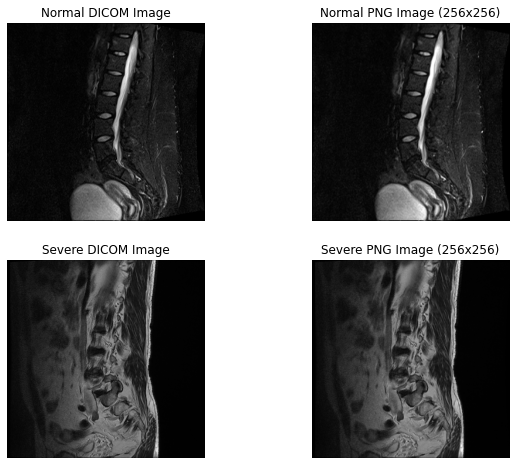

(Dataset.file_meta -------------------------------
 (0002, 0001) File Meta Information Version       OB: b'\x00\x01'
 (0002, 0002) Media Storage SOP Class UID         UI: Enhanced MR Image Storage
 (0002, 0003) Media Storage SOP Instance UID      UI: 262749243.1.7
 (0002, 0010) Transfer Syntax UID                 UI: RLE Lossless
 (0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
 (0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.4.2'
 -------------------------------------------------
 (0008, 0018) SOP Instance UID                    UI: 262749243.1.7
 (0008, 0023) Content Date                        DA: '20240503'
 (0008, 0033) Content Time                        TM: '223726.757199'
 (0008, 103e) Series Description                  LO: ''
 (0010, 0020) Patient ID                          LO: '262749243'
 (0018, 0050) Slice Thickness                     DS: '4.0'
 (0018, 0088) Spacing Between Slices              DS: '4.6'
 (0018, 5100) Patient Positio

In [12]:
# Randomly select one normal and one severe sample for comparison
import random
import cv2
# Re-importing matplotlib for plotting
import matplotlib.pyplot as plt

# Randomly select indices for normal and severe images
random_normal_index = random.randint(0, len(normal_files) - 1)
random_severe_index = random.randint(0, len(severe_files) - 1)

# Get corresponding DICOM and PNG file paths
random_normal_dicom_file = list(normal_mapping.keys())[random_normal_index]
random_normal_png_file = normal_mapping[random_normal_dicom_file]

random_severe_dicom_file = list(severe_mapping.keys())[random_severe_index]
random_severe_png_file = severe_mapping[random_severe_dicom_file]

# Load the DICOM files and their metadata
normal_dicom_data = pydicom.dcmread(random_normal_dicom_file)
severe_dicom_data = pydicom.dcmread(random_severe_dicom_file)

# Load the corresponding PNG images
normal_png_image = cv2.imread(random_normal_png_file, cv2.IMREAD_GRAYSCALE)
severe_png_image = cv2.imread(random_severe_png_file, cv2.IMREAD_GRAYSCALE)

# Display the DICOM images and their corresponding PNG images
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(normal_dicom_data.pixel_array, cmap='gray')
plt.title("Normal DICOM Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(normal_png_image, cmap='gray')
plt.title("Normal PNG Image (256x256)")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(severe_dicom_data.pixel_array, cmap='gray')
plt.title("Severe DICOM Image")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(severe_png_image, cmap='gray')
plt.title("Severe PNG Image (256x256)")
plt.axis('off')

plt.show()

# Display the DICOM metadata for both images
normal_dicom_data, severe_dicom_data


# 전처리

- T2 세아리기

In [13]:
# Function to count files based on whether 'T2' is in Series Description
def count_T2_files(dicom_files):
    T2_count = 0
    non_T2_count = 0

    for dicom_file in dicom_files:
        dicom_data = pydicom.dcmread(dicom_file)
        
        # Check if 'T2' is in the Series Description
        if 'T2' in dicom_data.SeriesDescription:
            T2_count += 1
        else:
            non_T2_count += 1

    return T2_count, non_T2_count

# Get the list of all DICOM files from both normal and severe directories
all_dicom_files = [os.path.join(normal_extract_dir, file) for file in normal_files] + \
                  [os.path.join(severe_extract_dir, file) for file in severe_files]

# Count files based on Series Description containing 'T2'
T2_count, non_T2_count = count_T2_files(all_dicom_files)

T2_count, non_T2_count


(122, 45)

In [14]:
# Function to count T2 and non-T2 files for a given directory
def count_T2_in_directory(dicom_directory):
    T2_count = 0
    non_T2_count = 0

    for root, dirs, files in os.walk(dicom_directory):
        for file in files:
            if file.endswith(".dcm"):
                dicom_file = os.path.join(root, file)
                dicom_data = pydicom.dcmread(dicom_file)
                
                # Check if 'T2' is in the Series Description
                if 'T2' in dicom_data.SeriesDescription:
                    T2_count += 1
                else:
                    non_T2_count += 1

    return T2_count, non_T2_count

# Count T2 and non-T2 files for normal and severe directories
normal_T2_count, normal_non_T2_count = count_T2_in_directory(normal_extract_dir)
severe_T2_count, severe_non_T2_count = count_T2_in_directory(severe_extract_dir)

normal_T2_count, normal_non_T2_count, severe_T2_count, severe_non_T2_count


(74, 25, 48, 20)

- T2 Sorting 전처리

In [15]:
# Function to extract the DICOM file paths for T2 images only
def get_T2_files(dicom_directory):
    T2_files = []

    for root, dirs, files in os.walk(dicom_directory):
        for file in files:
            if file.endswith(".dcm"):
                dicom_file = os.path.join(root, file)
                dicom_data = pydicom.dcmread(dicom_file)
                
                # Check if 'T2' is in the Series Description and store the file if true
                if 'T2' in dicom_data.SeriesDescription:
                    T2_files.append(dicom_file)

    return T2_files

# Get the list of T2 DICOM files for normal and severe datasets
T2_normal_files = get_T2_files(normal_extract_dir)
T2_severe_files = get_T2_files(severe_extract_dir)

# Combine T2 DICOM files for further analysis
T2_combined_files = T2_normal_files + T2_severe_files

# Display the first few T2 files to verify sorting
T2_normal_files[:5], T2_severe_files[:5]


(['Normal_99/106310815.dcm',
  'Normal_99/10728036.dcm',
  'Normal_99/108348787.dcm',
  'Normal_99/109454808.dcm',
  'Normal_99/109677683.dcm'],
 ['Severe_68/1084486898.dcm',
  'Severe_68/1106510276.dcm',
  'Severe_68/1121141304.dcm',
  'Severe_68/1179643011.dcm',
  'Severe_68/1302048123.dcm'])

### 데이터 증강

Auto 데이터 증강을 통해 약 5배 수준으로 데이터를 늘리는 방식을 적용하겠습니다. 이를 위해 다양한 증강 기법을 랜덤하게 결합하여 이미지를 증강하는 방식으로 설정하겠습니다. 자동화된 증강은 다음과 같은 기법을 사용하여 5배로 데이터를 늘릴 수 있습니다.

자동화 증강 방법:
회전 (Rotation): -10도에서 +10도 범위로 랜덤 회전.
수평 반전 (Horizontal Flip): 랜덤 반전 적용.
이동 (Translation): 좌우 5% 내외로 랜덤 이동.
확대/축소 (Zoom): 5% 내외로 랜덤 확대/축소.
밝기 조정 (Brightness Adjustment): 밝기 랜덤 조정.
노이즈 추가 (Adding Noise): 랜덤하게 가우시안 노이즈 적용.
증강을 적용한 각 이미지에 대해 랜덤하게 다양한 조합을 적용하여 5배 수준으로 자동으로 증강할 수 있습니다.

데이터 양:
정상인 데이터: 74개 × 5 = 370개
환자 데이터: 48개 × 5 = 240개
자동화 증강을 적용하여 이 수준으로 데이터를 늘리겠습니다. 바로 증강을 시작할까요?

In [19]:
# Define a function to manually perform augmentations using OpenCV and NumPy
def manual_augment_and_save_images(input_dir, output_dir, target_count):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    image_files = os.listdir(input_dir)
    current_count = len(image_files)
    multiplier = target_count // current_count  # Determine how many augmentations per image are needed

    def apply_augmentations(img):
        augmented_images = []
        # Apply random rotations
        for angle in [-10, 10]:
            (h, w) = img.shape[:2]
            center = (w // 2, h // 2)
            M = cv2.getRotationMatrix2D(center, angle, 1.0)
            rotated = cv2.warpAffine(img, M, (w, h))
            augmented_images.append(rotated)

        # Apply horizontal flip
        flipped = cv2.flip(img, 1)
        augmented_images.append(flipped)

        # Apply random zoom (scaling by 5%)
        for scale in [0.95, 1.05]:
            resized = cv2.resize(img, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)
            if resized.shape != img.shape:
                resized = cv2.resize(resized, (img.shape[1], img.shape[0]))
            augmented_images.append(resized)

        # Apply brightness adjustment
        for brightness in [0.8, 1.2]:
            bright = cv2.convertScaleAbs(img, alpha=brightness, beta=0)
            augmented_images.append(bright)

        return augmented_images

    # Augment images
    img_count = 0
    for file in image_files:
        img = cv2.imread(os.path.join(input_dir, file), cv2.IMREAD_GRAYSCALE)

        # Save the original image
        cv2.imwrite(os.path.join(output_dir, f"original_{img_count}.png"), img)
        img_count += 1

        # Apply augmentations and save
        augmented_imgs = apply_augmentations(img)
        for aug_img in augmented_imgs[:multiplier-1]:  # Apply only the required number of augmentations
            cv2.imwrite(os.path.join(output_dir, f"aug_{img_count}.png"), aug_img)
            img_count += 1
            if img_count >= target_count:
                break
        if img_count >= target_count:
            break

# Apply the manual augmentation to both normal and severe datasets
manual_augment_and_save_images(resized_normal_extract_dir, '/mnt/data/Augmented_Normal/', 370)
manual_augment_and_save_images(resized_severe_extract_dir, '/mnt/data/Augmented_Severe/', 240)

# Check the number of augmented images generated in the directories
len(os.listdir('/mnt/data/Augmented_Normal/')), len(os.listdir('/mnt/data/Augmented_Severe/'))


(492, 268)

Displaying 5 random images from the augmented normal dataset:


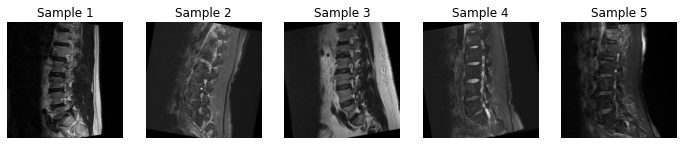

Displaying 5 random images from the augmented severe dataset:


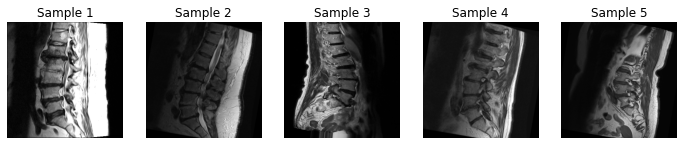

In [18]:
# Function to display random augmented images
def display_random_augmented_images(image_dir, num_samples=5):
    image_files = os.listdir(image_dir)
    random_files = random.sample(image_files, num_samples)
    
    plt.figure(figsize=(12, 8))
    
    for i, file in enumerate(random_files):
        img = cv2.imread(os.path.join(image_dir, file), cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Sample {i + 1}")
        plt.axis('off')
    
    plt.show()

# Display 5 random images from the augmented normal and severe datasets
print("Displaying 5 random images from the augmented normal dataset:")
display_random_augmented_images('/mnt/data/Augmented_Normal/')

print("Displaying 5 random images from the augmented severe dataset:")
display_random_augmented_images('/mnt/data/Augmented_Severe/')


- 추가 증강

In [20]:
# Apply additional augmentation to reach the target counts
def augment_until_target(input_dir, output_dir, current_count, target_count):
    image_files = os.listdir(input_dir)
    def apply_augmentations(img):
        augmented_images = []
        # Apply random rotations
        for angle in [-10, 10]:
            (h, w) = img.shape[:2]
            center = (w // 2, h // 2)
            M = cv2.getRotationMatrix2D(center, angle, 1.0)
            rotated = cv2.warpAffine(img, M, (w, h))
            augmented_images.append(rotated)

        # Apply horizontal flip
        flipped = cv2.flip(img, 1)
        augmented_images.append(flipped)

        # Apply random zoom (scaling by 5%)
        for scale in [0.95, 1.05]:
            resized = cv2.resize(img, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)
            if resized.shape != img.shape:
                resized = cv2.resize(resized, (img.shape[1], img.shape[0]))
            augmented_images.append(resized)

        # Apply brightness adjustment
        for brightness in [0.8, 1.2]:
            bright = cv2.convertScaleAbs(img, alpha=brightness, beta=0)
            augmented_images.append(bright)

        return augmented_images

    # Augment images
    img_count = current_count
    while img_count < target_count:
        for file in image_files:
            img = cv2.imread(os.path.join(input_dir, file), cv2.IMREAD_GRAYSCALE)
            augmented_imgs = apply_augmentations(img)
            for aug_img in augmented_imgs:  # Apply all augmentations
                cv2.imwrite(os.path.join(output_dir, f"aug_{img_count}.png"), aug_img)
                img_count += 1
                if img_count >= target_count:
                    break
            if img_count >= target_count:
                break

# Apply additional augmentation to reach 492 for normal and 268 for severe
augment_until_target(resized_normal_extract_dir, '/mnt/data/Augmented_Normal/', 297, 492)
augment_until_target(resized_severe_extract_dir, '/mnt/data/Augmented_Severe/', 204, 268)

# Check the final number of augmented images
len(os.listdir('/mnt/data/Augmented_Normal/')), len(os.listdir('/mnt/data/Augmented_Severe/'))


(687, 332)

# 머신러닝 트레이닝

In [23]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import cv2
import os
import numpy as np

# Load image data and labels (0 for normal, 1 for severe)
def load_images(image_dir, label):
    images = []
    labels = []
    for file in os.listdir(image_dir):
        img = cv2.imread(os.path.join(image_dir, file), cv2.IMREAD_GRAYSCALE)
        img_flattened = img.flatten()  # Flatten the 256x256 image to a 1D vector
        images.append(img_flattened)
        labels.append(label)
    return np.array(images), np.array(labels)

# Load normal and severe images
X_normal, y_normal = load_images('IDC_Normalized_Augmented_Normal_492/', 0)
X_severe, y_severe = load_images('IDC_Normalized_Augmented_Severe_268/', 1)

# Combine the datasets
X = np.vstack((X_normal, X_severe))
y = np.hstack((y_normal, y_severe))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM classifier
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.93      0.80        94
           1       0.75      0.36      0.49        58

    accuracy                           0.71       152
   macro avg       0.73      0.64      0.64       152
weighted avg       0.72      0.71      0.68       152



# Final testing

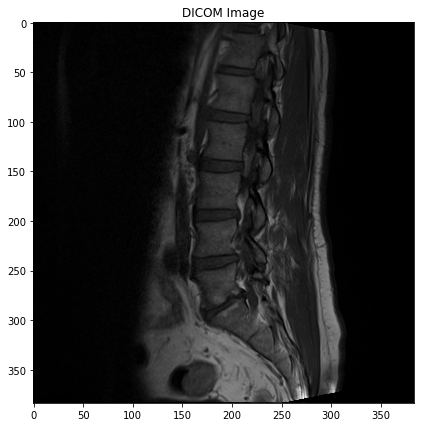

정상입니다.


In [36]:
# 필요한 모듈 불러오기
import pydicom
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import pickle

########### Input ########################################
# DICOM 파일 경로 설정
dcm_file_path = '13317052_forTesting_0.dcm'
# 모델 불러오기 (사전 학습된 모델이 저장된 경로 지정)
with open('final_tuned_model.pkl', 'rb') as model_file:
    rf_clf = pickle.load(model_file)
##########################################################

# DICOM 파일 읽기
dcm_data = pydicom.dcmread(dcm_file_path)

# DICOM 이미지 데이터 추출
dcm_image = dcm_data.pixel_array

# 이미지 시각화 (선택 사항)
plt.figure(figsize=(7, 7))  # figsize 인자로 크기 조정 (10x10 크기로 설정)
plt.imshow(dcm_image, cmap='gray')
plt.title('DICOM Image')
plt.show()

# PIL을 사용하여 이미지를 256x256 크기로 리사이즈
img_pil = Image.fromarray(dcm_image).convert('L')  # 그레이스케일로 변환
img_resized_256 = img_pil.resize((256, 256))  # 크기 조정
img_array_256 = np.array(img_resized_256).flatten()  # 1D 배열로 변환

# 모델 예측
img_array_reshaped_256 = img_array_256.reshape(1, -1)
prediction = rf_clf.predict(img_array_reshaped_256)

# 예측 결과 출력
if prediction[0] == 0:
    print("정상입니다.")
else:
    print("허리 디스크 환자입니다.")


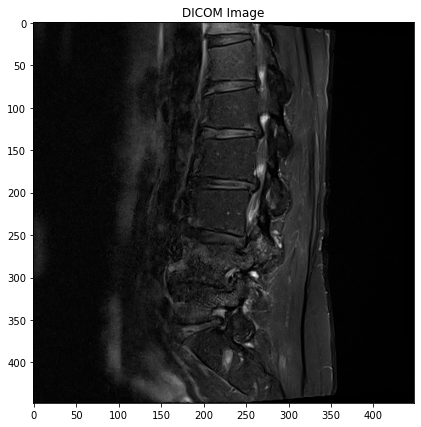

허리 디스크 환자입니다.


In [37]:
# 필요한 모듈 불러오기
import pydicom
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import pickle

########### Input ########################################
# DICOM 파일 경로 설정
dcm_file_path = '3318343342_forTesting_1.dcm'
# 모델 불러오기 (사전 학습된 모델이 저장된 경로 지정)
with open('final_tuned_model.pkl', 'rb') as model_file:
    rf_clf = pickle.load(model_file)
##########################################################
# DICOM 파일 읽기
dcm_data = pydicom.dcmread(dcm_file_path)

# DICOM 이미지 데이터 추출
dcm_image = dcm_data.pixel_array

# 이미지 시각화 (선택 사항)
plt.figure(figsize=(7, 7))  # figsize 인자로 크기 조정 (10x10 크기로 설정)
plt.imshow(dcm_image, cmap='gray')
plt.title('DICOM Image')
plt.show()

# PIL을 사용하여 이미지를 256x256 크기로 리사이즈
img_pil = Image.fromarray(dcm_image).convert('L')  # 그레이스케일로 변환
img_resized_256 = img_pil.resize((256, 256))  # 크기 조정
img_array_256 = np.array(img_resized_256).flatten()  # 1D 배열로 변환

# 모델 불러오기 (사전 학습된 모델이 저장된 경로 지정)
with open('final_tuned_model.pkl', 'rb') as model_file:
    rf_clf = pickle.load(model_file)

# 모델 예측
img_array_reshaped_256 = img_array_256.reshape(1, -1)
prediction = rf_clf.predict(img_array_reshaped_256)

# 예측 결과 출력
if prediction[0] == 0:
    print("정상입니다.")
else:
    print("허리 디스크 환자입니다.")


# CNN